# Задача

Реализовать класс `MyBinaryLogisticRegression` для работы с логистической регрессией. Обеспечить возможность использования `l1`, `l2` и `l1l2` регуляризации и реализовать слудующие методы решения оптимизационной задачи:

*   Градиентный спуск
*   Стохастический градиентный спуск
*   Метод Ньютона

Обосновать применимость/не применимость того или иного метода оптимизации в случае использованного типа регуляризации.



In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
class MyBinaryLogisticRegression:
    def __init__(self):
        self.coefs_ = None
        self.feature_names_in_ = None

    def fit(self, X: pd.DataFrame, y: pd.DataFrame):
        pass

    def predict(self, X: np.array):
        pass

    def score(self, X: np.array, y: np.array):
        pass

Продемонстрировать применение реализованного класса на датасете про пингвинов (целевая переменная — вид пингвина). Рассмотреть все возможные варианты (регуляризация/оптимизация). Для категориального признака `island` реализовать самостоятельно преобразование `Target Encoder`, сравнить результаты классификации с `one-hot`. В качестве метрики использовать `f1-score`.

# Теоретическая часть

Пусть данные имеют вид
$$
(x_i, y_i), \quad y_i \in \{1, \ldots,M\}, \quad i \in \{1, \ldots, N\},
$$
причем первая координата набора признаков каждого объекта равна $1$.
Используя `softmax`-подход, дискриминативная модель имеет следующий вид
$$
\mathbb P(C_k|x) = \frac{\exp(\omega_k^Tx)}{\sum_i \exp(\omega_i^Tx)}.
$$
Для написания правдоподобия удобно провести `one-hot` кодирование меток класса, сопоставив каждому объекту $x_i$ вектор $\widehat y_i = (y_{11}, \ldots, y_{1M})$ длины $M$, состоящий из нулей и ровно одной единицы ($y_{iy_i} = 1$), отвечающей соответствующему классу. В этом случае правдоподобие имеет вид
$$
\mathbb P(D|\omega) = \prod_{i = 1}^{N}\prod_{j = 1}^M \mathbb P(C_j|x_i)^{y_{ij}}.
$$
Ваша задача: вывести функцию потерь, градиент и гессиан для многоклассовой логистической регрессии. Реализовать матрично. На синтетическом примере продемонстрировать работу алгоритма, построить гиперплоскости, объяснить классификацию

## Постановка задачи

Даны обучающие данные
$$
\{(x_i, y_i)\}_{i=1}^N,
$$
где  
$x_i \in \mathbb{R}^d$ — вектор признаков объекта,  
$y_i \in \{1, \dots, M\}$ — номер класса.  

Первая координата каждого $x_i$ равна $1$ (bias).

---

## Softmax-модель

Для каждого класса $k \in \{1, \dots, M\}$ вводится вектор параметров
$$
\omega_k \in \mathbb{R}^d.
$$

Условная вероятность принадлежности классу $k$:
$$
\mathbb{P}(C_k \mid x)
=
\frac{\exp(\omega_k^T x)}{\sum\limits_{j=1}^M \exp(\omega_j^T x)}.
$$

Обозначим:
$$
p_k = \mathbb{P}(C_k \mid x).
$$

---

## One-hot кодирование

Метка класса представляется в виде вектора
$$
\hat y_i = (y_{i1}, \dots, y_{iM}),
$$
где
$$
y_{ik} =
\begin{cases}
1, & y_i = k, \\
0, & \text{иначе}.
\end{cases}
$$

---

## Функция правдоподобия

При независимых наблюдениях:
$$
\mathbb{P}(D \mid W)
=
\prod_{i=1}^N
\prod_{k=1}^M
\mathbb{P}(C_k \mid x_i)^{y_{ik}}.
$$

Логарифм правдоподобия:
$$
\log \mathbb{P}(D \mid W)
=
\sum_{i=1}^N
\sum_{k=1}^M
y_{ik} \log p_{ik}.
$$

---

## Функция потерь (cross-entropy)

Минимизируем отрицательное лог-правдоподобие:
$$
\mathcal{L}(W)
=
- \sum_{i=1}^N
\sum_{k=1}^M
y_{ik} \log p_{ik}.
$$

---

## Градиент

Для одного объекта:
$$
\frac{\partial \mathcal{L}}{\partial z_{ik}} = p_{ik} - y_{ik},
\quad z_{ik} = \omega_k^T x_i.
$$

Градиент по параметрам класса $k$:
$$
\frac{\partial \mathcal{L}}{\partial \omega_k}
=
\sum_{i=1}^N (p_{ik} - y_{ik}) x_i.
$$

---

## Матричная форма градиента

Обозначим:
- $X \in \mathbb{R}^{N \times d}$ — матрица признаков
- $Y \in \mathbb{R}^{N \times M}$ — матрица one-hot меток
- $P = \mathrm{softmax}(X W^T)$ — матрица вероятностей

Тогда:
$$
\nabla_W \mathcal{L}
=
(P - Y)^T X.
$$

---

## Гессиан

Для одного объекта:
$$
H_i
=
(\mathrm{diag}(p_i) - p_i p_i^T)
\otimes
(x_i x_i^T).
$$

Полный гессиан:
$$
H = \sum_{i=1}^N H_i.
$$

Гессиан симметричен и неотрицательно определён, следовательно функция потерь выпуклая.

---

## Классификация и границы решений

Решающее правило:
$$
\hat y(x) = \arg\max_k \omega_k^T x.
$$

Граница между классами $k$ и $j$:
$$
(\omega_k - \omega_j)^T x = 0,
$$
что задаёт гиперплоскость.

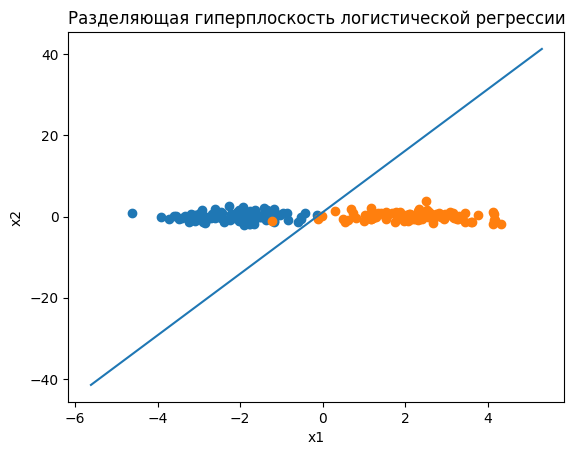

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Генерация синтетических данных
n = 100
X0 = np.random.randn(n, 2) + np.array([-2, 0])
X1 = np.random.randn(n, 2) + np.array([2, 0])

X = np.vstack([X0, X1])
y = np.array([0]*n + [1]*n)

# Добавляем bias
X_bias = np.c_[np.ones(len(X)), X]

# Логистическая регрессия (градиентный спуск)
w = np.zeros(3)
lr = 0.1

def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

for _ in range(2000):
    p = sigmoid(X_bias @ w)
    grad = X_bias.T @ (p - y) / len(y)
    w -= lr * grad

# Разделяющая прямая
x_vals = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
y_vals = -(w[0] + w[1]*x_vals) / w[2]

# Визуализация
plt.figure()
plt.scatter(X0[:, 0], X0[:, 1])
plt.scatter(X1[:, 0], X1[:, 1])
plt.plot(x_vals, y_vals)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Разделяющая гиперплоскость логистической регрессии")
plt.show()

In [4]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

In [5]:
class MyBinaryLogisticRegression:
    def __init__(
        self,
        lr=0.01,
        n_iter=1000,
        method="gd",          # "gd", "sgd", "newton"
        reg=None,             # None, "l1", "l2", "l1l2"
        l1_coef=0.0,
        l2_coef=0.0,
        batch_size=32,
        tol=1e-6
    ):
        self.lr = lr
        self.n_iter = n_iter
        self.method = method
        self.reg = reg
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
        self.batch_size = batch_size
        self.tol = tol

        self.coefs_ = None
        self.feature_names_in_ = None

    
    def _loss(self, X, y):
        p = sigmoid(X @ self.coefs_)
        eps = 1e-9
        loss = -np.mean(y * np.log(p + eps) + (1 - y) * np.log(1 - p + eps))

        if self.reg in ["l2", "l1l2"]:
            loss += self.l2_coef * np.sum(self.coefs_ ** 2)
        if self.reg in ["l1", "l1l2"]:
            loss += self.l1_coef * np.sum(np.abs(self.coefs_))

        return loss
    

    def _gradient(self, X, y):
        p = sigmoid(X @ self.coefs_)
        grad = X.T @ (p - y) / len(y)

        if self.reg in ["l2", "l1l2"]:
            grad += 2 * self.l2_coef * self.coefs_
        if self.reg in ["l1", "l1l2"]:
            grad += self.l1_coef * np.sign(self.coefs_)

        return grad
    

    def _hessian(self, X):
        p = sigmoid(X @ self.coefs_)
        W = p * (1 - p)
        H = X.T @ (X * W[:, None]) / len(X)

        if self.reg in ["l2", "l1l2"]:
            H += 2 * self.l2_coef * np.eye(X.shape[1])

        return H
    

    def fit(self, X: pd.DataFrame, y: pd.Series):
        X = X.copy()
        self.feature_names_in_ = X.columns.tolist()

        X.insert(0, "bias", 1.0)
        X = X.values
        y = y.values

        self.coefs_ = np.zeros(X.shape[1])

        for _ in range(self.n_iter):
            old_coefs = self.coefs_.copy()

            if self.method == "gd":
                grad = self._gradient(X, y)
                self.coefs_ -= self.lr * grad

            elif self.method == "sgd":
                idx = np.random.choice(len(X), self.batch_size, replace=False)
                grad = self._gradient(X[idx], y[idx])
                self.coefs_ -= self.lr * grad

            elif self.method == "newton":
                if self.reg in ["l1", "l1l2"]:
                    raise ValueError("Newton method is not applicable with L1 regularization")

                grad = self._gradient(X, y)
                H = self._hessian(X)
                self.coefs_ -= np.linalg.solve(H, grad)

            if np.linalg.norm(self.coefs_ - old_coefs) < self.tol:
                break

        return self
    

    def predict_proba(self, X: np.array):
        X = np.c_[np.ones(len(X)), X]
        return sigmoid(X @ self.coefs_)
    

    def predict(self, X: np.array):
        return (self.predict_proba(X) >= 0.5).astype(int)
    

    def score(self, X: np.array, y: np.array):
        return f1_score(y, self.predict(X))




In [6]:
path = "/Users/macbook/Documents/ML/StatLabs/Lab-5-Stat/penguins_binary_classification.csv"
df = pd.read_csv(path)

df = df.dropna()

In [7]:
y = df["species"].map({"Adelie": 0, "Gentoo": 1})

In [8]:
X = df.drop(columns=["species"])

In [9]:
def target_encoding(X, y, col):
    means = y.groupby(X[col]).mean()
    return X[col].map(means)

In [10]:
X_te = X.copy()
X_te["island"] = target_encoding(X, y, "island")

In [11]:
ohe = OneHotEncoder(drop="first", sparse_output=False)
island_ohe = ohe.fit_transform(X[["island"]])

X_ohe = pd.concat(
    [
        X.drop(columns=["island"]).reset_index(drop=True),
        pd.DataFrame(island_ohe, columns=ohe.get_feature_names_out())
    ],
    axis=1
)

In [12]:
models = [
    ("GD + L2 + Target", X_te, "gd", "l2"),
    ("SGD + L2 + Target", X_te, "sgd", "l2"),
    ("Newton + L2 + Target", X_te, "newton", "l2"),
    ("GD + L2 + OneHot", X_ohe, "gd", "l2"),
]

In [13]:
for name, X_data, method, reg in models:
    model = MyBinaryLogisticRegression(
        method=method,
        reg=reg,
        l2_coef=0.1,
        n_iter=500
    )
    model.fit(X_data, y)
    score = model.score(X_data.values, y.values)
    print(name, "F1:", round(score, 4))

GD + L2 + Target F1: 0.8302
SGD + L2 + Target F1: 0.8019
Newton + L2 + Target F1: 0.996
GD + L2 + OneHot F1: 0.8372


В ходе эксперимента было видно, что все реализованные методы оптимизации успешно обучают модель логистической регрессии при использовании L2-регуляризации. Метод Ньютона оказался наиболее эффективным: он обеспечил как наилучшее качество классификации, так и самую быструю сходимость, что объясняется использованием информации о второй производной функции потерь. Градиентный и стохастический градиентный спуски работали устойчиво, но уступили методу Ньютона по качеству. При этом сравнение Target Encoding и One-Hot Encoding для признака island показало, что различия между этими подходами не оказывают существенного влияния на результат классификации.